In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pylatexenc import *
from qiskit import *
from qiskit_aer import *
from qiskit_ibm_runtime import *
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.primitives.sampler import Sampler
from qiskit.circuit.library import MCMT

In [8]:
ibm_quantum_service = QiskitRuntimeService(
                                channel="ibm_quantum",
                                token="69aa86585a48bc18de1dd1cddad4010b14f2a2c13224a158cc534c9870b3fcc38baaace69d25e1f39528f05a363f0811aa79b9dd28b4e942d2f70b7aa2a90d86",
                                instance="ibm-q/open/main"
                              )

# Two Q-bits circuit

In [9]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

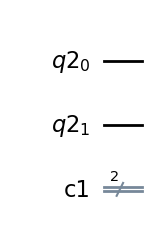

In [10]:
circuit.draw(output="mpl",style="iqp")

In [11]:
circuit.h(qr[0])

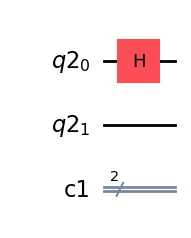

In [12]:
circuit.draw(output="mpl",style="iqp")

# Circuit with 3 q-bits

In [13]:
# Build a quantum circuit
circuit = QuantumCircuit(3, 3)
 
circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));

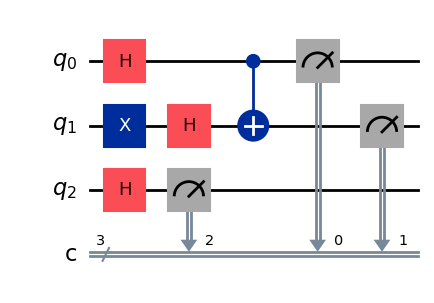

In [14]:
circuit.draw(output="mpl",style="iqp")

# TP

In [15]:
qc = QuantumCircuit(1,1)

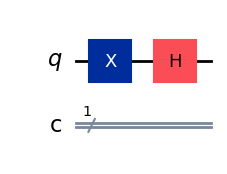

In [16]:
qc.x(0)
qc.h(0)
qc.draw(output="mpl",style="iqp")

 Quasi probability distribution : [{0: 0.494, 1: 0.506}]


C:\Users\marco\AppData\Local\Temp\ipykernel_24804\2316944358.py:7: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(result.quasi_dists)


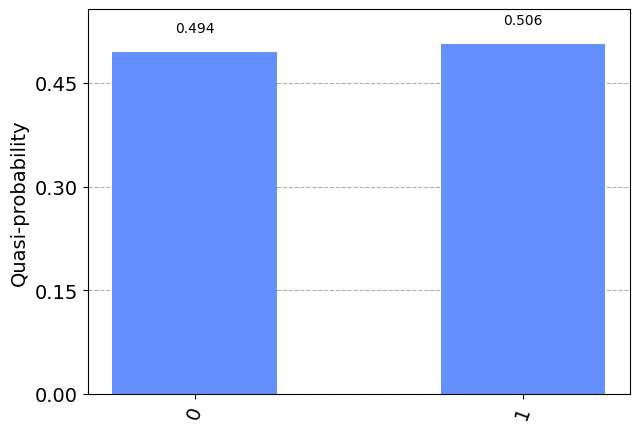

In [17]:
qc.measure(0,0)
sampler = Sampler()
job = sampler.run(qc, shots= 1000)
result = job.result()
print(f' Quasi probability distribution : {result.quasi_dists}')

plot_histogram(result.quasi_dists)

 Quasi probability distribution : [{0: 0.5, 1: 0.5}]


C:\Users\marco\AppData\Local\Temp\ipykernel_24804\1971060952.py:5: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(result.quasi_dists)


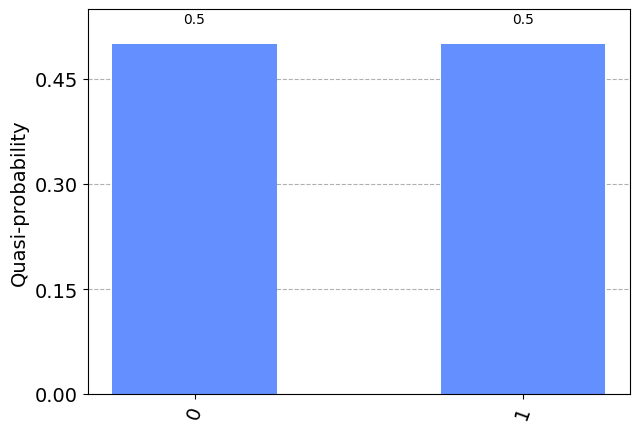

In [18]:
sampler = Sampler()
job = sampler.run(qc)
result = job.result()
print(f' Quasi probability distribution : {result.quasi_dists}')
plot_histogram(result.quasi_dists)

In the second test, we assume that our system is perfect. Notwithstanding the first one includes some errors.

State vector :  Statevector([ 1.-1.2246468e-16j, -0.+0.0000000e+00j],
            dims=(2,))


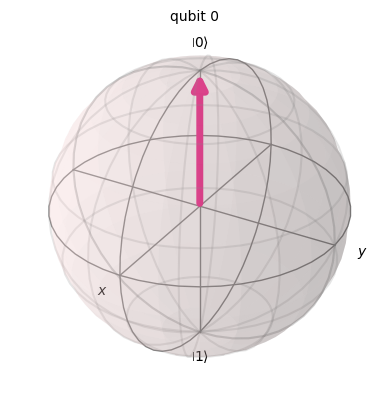

In [19]:
simulator = Aer.get_backend('statevector_simulator')
job = transpile(qc,simulator)
result = simulator.run(job).result()
state_vector = result.get_statevector()
print("State vector : ",state_vector)
plot_bloch_multivector(state_vector)

C:\Users\marco\AppData\Local\Temp\ipykernel_6764\2752951976.py:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.id as direct replacement.
  qc2.i(1)


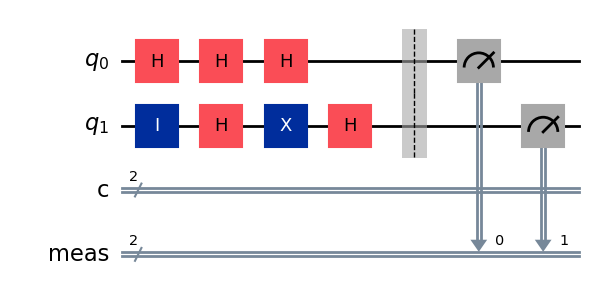

In [3]:
qc2 = QuantumCircuit(2,2)
qc2.h(0)
qc2.i(1)
qc2.h(0)
qc2.h(1)
qc2.h(0)
qc2.x(1)
qc2.h(1)

qc2.measure_all()
qc2.draw(output="mpl",style="iqp")

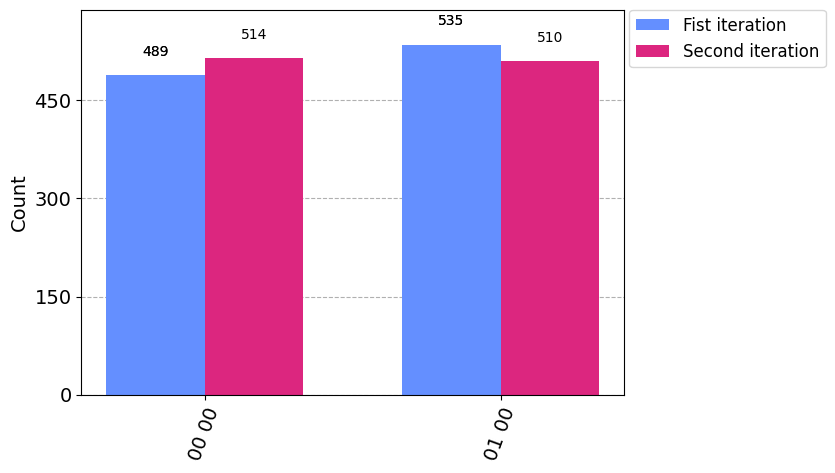

In [4]:
simulator2 = Aer.get_backend('qasm_simulator')
tqc2 = transpile(qc2,simulator2)
result2 = simulator2.run(tqc2).result()
result2_2 = simulator2.run(tqc2).result()

counts_1 = result2.get_counts()
counts_2 = result2_2.get_counts()

legend = ["Fist iteration","Second iteration"]
plot_histogram([counts_1,counts_2],legend=legend)

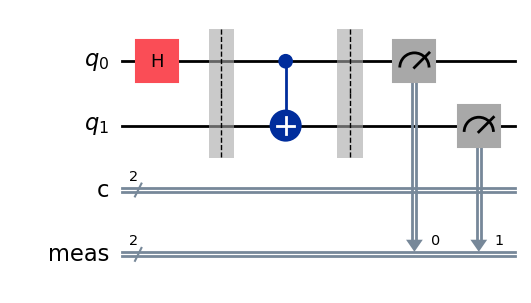

In [22]:
qc3 = QuantumCircuit(2,2)
qc3.h(0)
qc3.barrier()
qc3.cx(0,1)
qc3.measure_all()

qc3.draw(output="mpl",style="iqp")

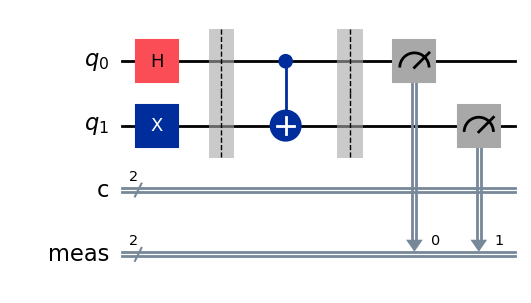

In [23]:
qc4 = QuantumCircuit(2,2)
qc4.h(0)
qc4.x(1)
qc4.barrier()
qc4.cx(0,1)
qc4.measure_all()

qc4.draw(output="mpl",style="iqp")

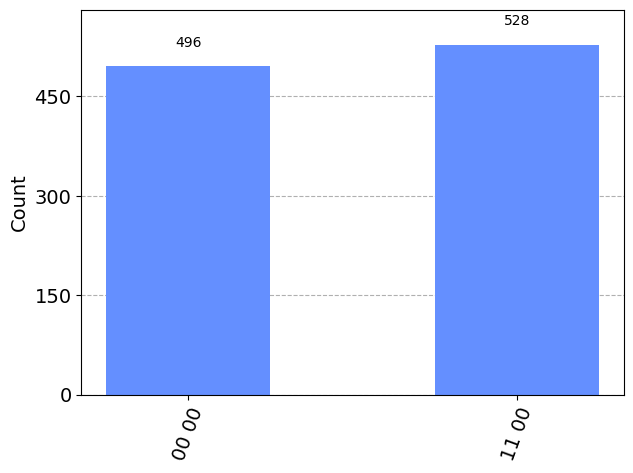

In [24]:
simulator3 = Aer.get_backend('qasm_simulator')
tqc3 = transpile(qc3,simulator3)
result3 = simulator3.run(tqc3).result()
counts = result3.get_counts()
plot_histogram(counts)

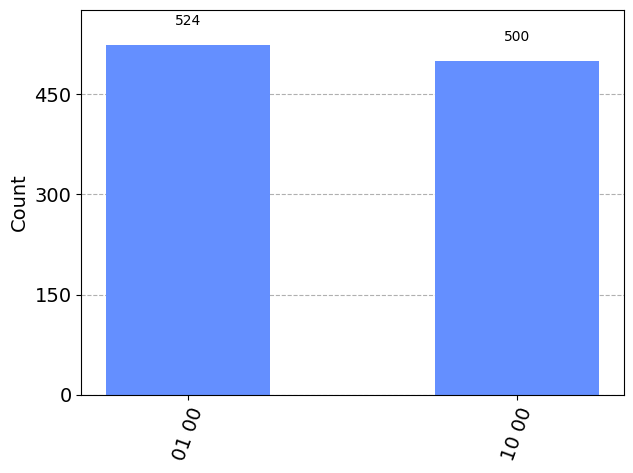

In [25]:
simulator4 = Aer.get_backend('qasm_simulator')
tqc4 = transpile(qc4,simulator4)
result4 = simulator4.run(tqc4).result()
counts = result4.get_counts()
plot_histogram(counts)

In [26]:
qc5_phi_p = QuantumCircuit(2)
qc5_phi_m = QuantumCircuit(2)
qc5_psi_p = QuantumCircuit(2)
qc5_psi_m = QuantumCircuit(2)

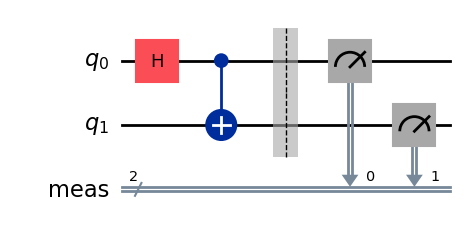

In [27]:
qc5_phi_p.h(0)
qc5_phi_p.cx(0,1)

qc5_phi_p.measure_all()
qc5_phi_p.draw(output="mpl",style="iqp")

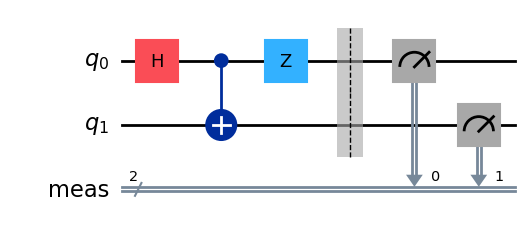

In [28]:
qc5_phi_m.h(0)
qc5_phi_m.cx(0,1)
qc5_phi_m.z(0)

qc5_phi_m.measure_all()
qc5_phi_m.draw(output="mpl",style="iqp")

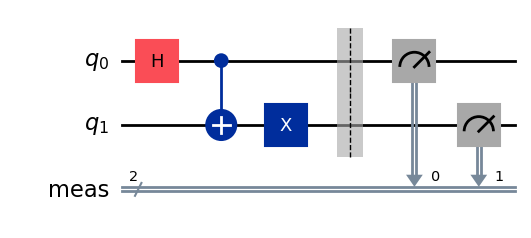

In [29]:
qc5_psi_p.h(0)
qc5_psi_p.cx(0,1)
qc5_psi_p.x(1)

qc5_psi_p.measure_all()
qc5_psi_p.draw(output="mpl",style="iqp")

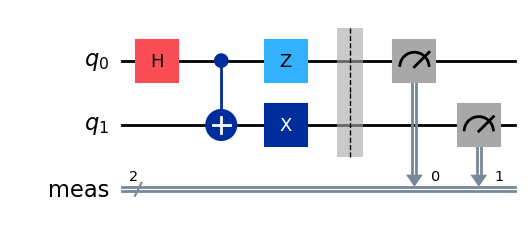

In [30]:
qc5_psi_m.h(0)
qc5_psi_m.cx(0,1)
qc5_psi_m.z(0)
qc5_psi_m.x(1)

qc5_psi_m.measure_all()
qc5_psi_m.draw(output="mpl",style="iqp")

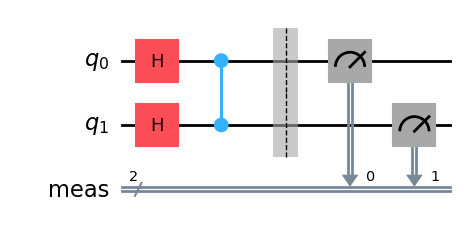

In [31]:
qc6 = QuantumCircuit(2)
qc6.h(0)
qc6.h(1)
qc6.cz(0,1)

qc6.measure_all()
qc6.draw(output="mpl",style="iqp")

State vector :  Statevector([ 0.+0.j,  0.+0.j,  1.+0.j, -0.+0.j],
            dims=(2, 2))


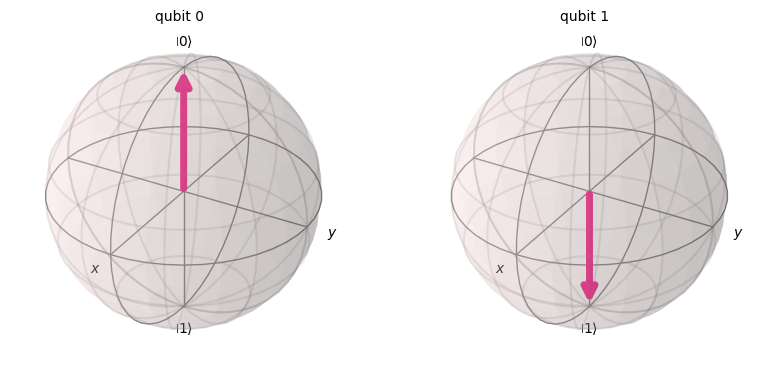

In [32]:
simulator6 = Aer.get_backend('statevector_simulator')
job6 = transpile(qc6,simulator6)
result6 = simulator6.run(job6).result()
state_vector6 = result6.get_statevector()
print("State vector : ",state_vector6)
plot_bloch_multivector(state_vector6)

# Quantum intrication / teleportation

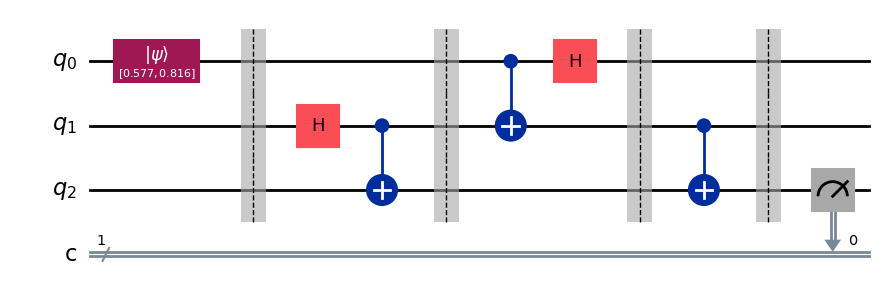

In [5]:
qc5 = QuantumCircuit(3,1)
state = [1/3**0.5,(2/3)**0.5]#initial coefficients
qc5.initialize(state,0)
qc5.barrier()
qc5.h(1)
qc5.cx(1,2)
qc5.barrier()
qc5.cx(0,1)
qc5.h(0)
qc5.barrier()
#qc5.measure([0,1],[0,1])
qc5.cx(1,2)
qc5.barrier()
qc5.measure(2,0)
qc5.draw('mpl',style="iqp")

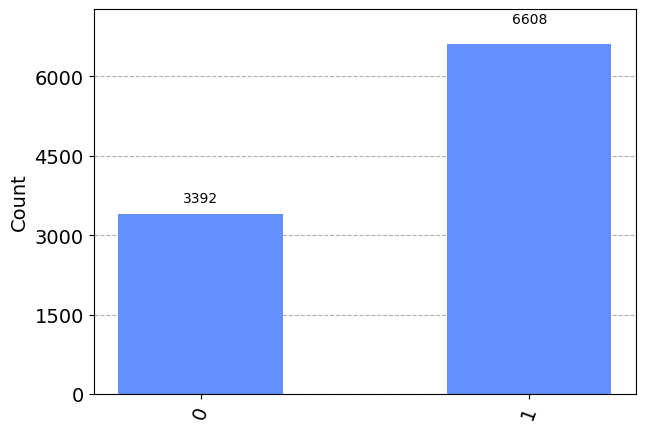

In [6]:
simulator = Aer.get_backend('qasm_simulator')
tqc5 =transpile(qc5, simulator)
result = simulator.run(tqc5,shots=10000).result()
plot_histogram(result.get_counts())

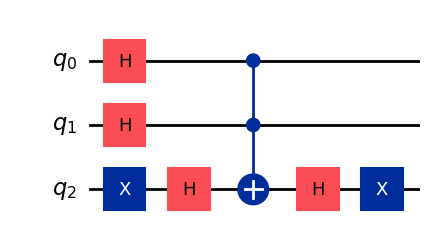

In [7]:
ccx = MCMT('cx',2,1)#we choose x as the targeting gate with 2 control qubits and 1 target qubit
qc6 = QuantumCircuit(3)
qc6.h([0,1])
qc6.x(2)#last qubit
qc6.h(2)
#qc6.append(ccx,[0,1,3])
qc6.compose(ccx,[0,1,2],inplace=True)
qc6.h(2)
qc6.x(2)
#qc6.measure_all()#measurement collapses the whole state in one basis state
qc6.draw('mpl',style='iqp')

In [8]:
simulator = Aer.get_backend('statevector_simulator')# shows us the superposition(coefficients) and phases of the final state
job6 = transpile(qc6, simulator)
result6 = simulator.run(job6).result()
statevector6 = result6.get_statevector()
print(statevector6)

Statevector([ 5.00000000e-01-9.18485099e-17j,
              5.00000000e-01-9.18485099e-17j,
              5.00000000e-01-9.18485099e-17j,
             -5.00000000e-01+9.18485099e-17j,
             -1.79202035e-17+3.06161700e-17j,
             -1.79202035e-17+3.06161700e-17j,
             -1.79202035e-17+3.06161700e-17j,
              1.79202035e-17-3.06161700e-17j],
            dims=(2, 2, 2))


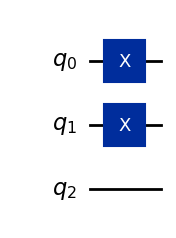

In [9]:
qc6 = QuantumCircuit(3)
qc6.x(0)
qc6.x(1)
qc6.draw('mpl',style='iqp')

In [10]:
simulator = Aer.get_backend('statevector_simulator')# shows us the superposition(coefficients) and phases of the final state
job6 = transpile(qc6, simulator)
result6 = simulator.run(job6).result()
statevector6 = result6.get_statevector()
print(statevector6)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


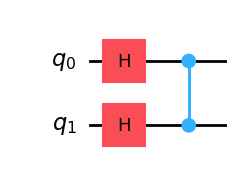

In [11]:
qc6 = QuantumCircuit(2)
qc6.h([0,1])
qc6.cz(0,1)
qc6.draw('mpl',style='iqp')

In [12]:
simulator = Aer.get_backend('statevector_simulator')# shows us the superposition(coefficients) and phases of the final state
job6 = transpile(qc6, simulator)
result6 = simulator.run(job6).result()
statevector6 = result6.get_statevector()
print(statevector6)

Statevector([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j],
            dims=(2, 2))


# Grover's Search Algorithm

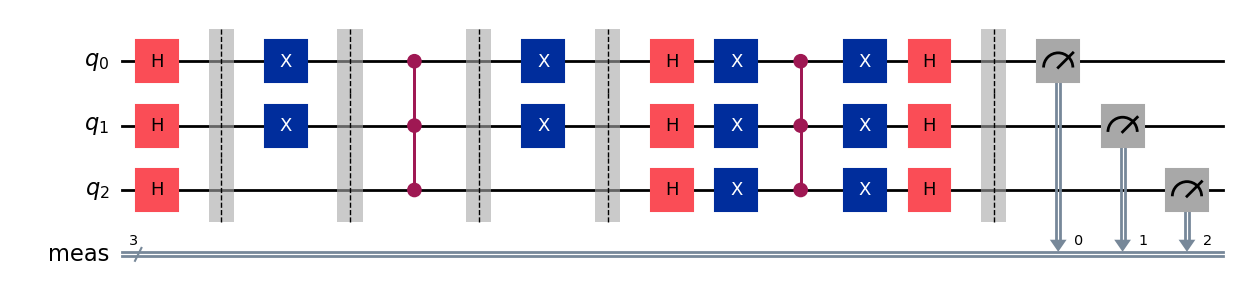

In [14]:
grov_qc = QuantumCircuit(3)
grov_qc.h([0,1,2])
grov_qc.barrier()
grov_qc.x([0,1])
grov_qc.barrier()
grov_qc.ccz(0,1,2)
grov_qc.barrier()
grov_qc.x([0,1])
grov_qc.barrier()

grov_qc.h([0,1,2])
grov_qc.x([0,1,2])
grov_qc.ccz(0,1,2)
grov_qc.x([0,1,2])
grov_qc.h([0,1,2])

grov_qc.measure_all()

grov_qc.draw(output="mpl",style="iqp")

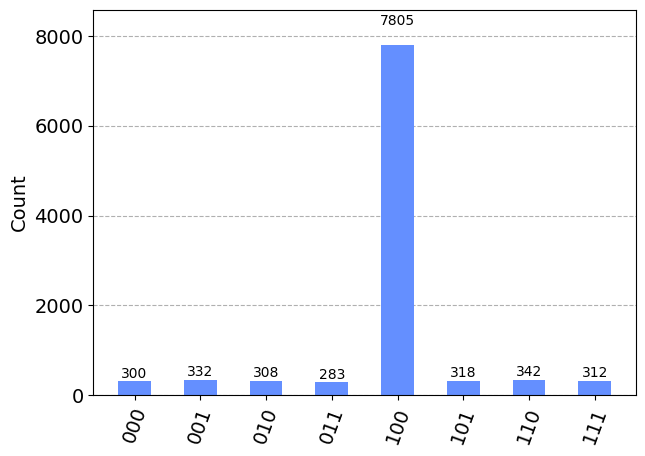

In [15]:
grov_simulator = Aer.get_backend('qasm_simulator')
grov_tqc = transpile(grov_qc,grov_simulator)
grov_result = grov_simulator.run(grov_tqc,shots=10000).result()
grov_counts = grov_result.get_counts()
plot_histogram(grov_counts)

In [16]:
def cnz(size:int):
    return(MCMT('cz',size-1,1))

In [17]:
def phase_oracle(target: str):
    target = target[::-1]
    qc = QuantumCircuit(len(target))
    for i in range(len(target)):
        if target[i] == '0':
            qc.x(i)
    qc.compose(cnz(len(target)),range(len(target)),inplace=True)

    for i in range(len(target)):
        if target[i] == '0':
            qc.x(i)
    
    return(qc)

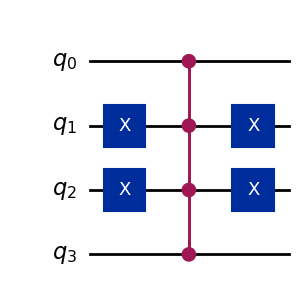

In [53]:
phase_oracle('1001').draw(output="mpl",style="iqp")

In [18]:
def diffuser_oracle(target:str):
    n = len(target)
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
        qc.x(i)
    qc.compose(cnz(n),range(n),inplace=True)
    for i in range(n):
        qc.x(i)
        qc.h(i)
    
    return(qc) 

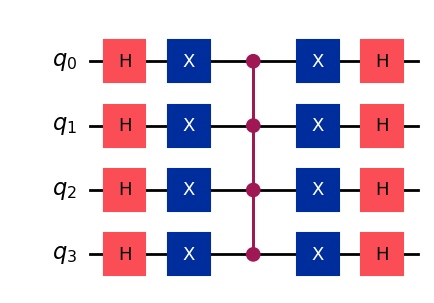

In [66]:
diffuser_oracle("1001").draw(output="mpl",style="iqp")

In [19]:
def n_rep(target:str):
    n = len(target) #nbr of qubit
    ns = 2**n #nbr of states
    r = round((np.pi/4)*np.sqrt(ns)-0.5)
    return r

In [22]:
def multirep(target:str):
    r = n_rep(target)
    n = len(target)
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.barrier
    for i in range(r):
        qc.compose(phase_oracle(target),range(n),inplace=True)
        qc.barrier()
        qc.compose(diffuser_oracle(target),range(n),inplace=True)
        qc.barrier()
    
    qc.measure_all()
    return(qc)

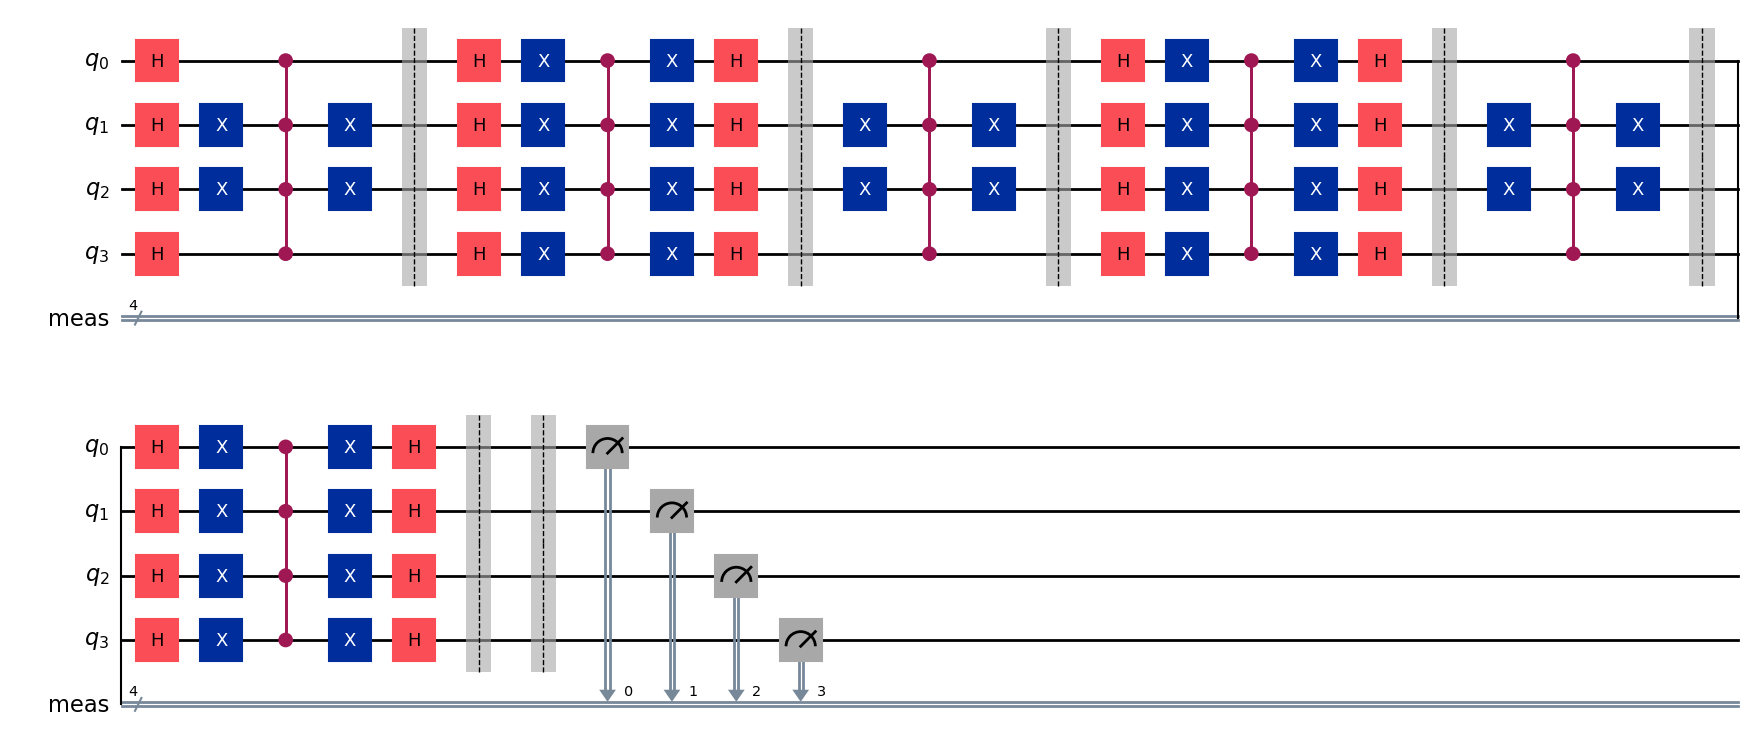

In [25]:
w = "1001"

multirep(w).draw(output="mpl",style="iqp")

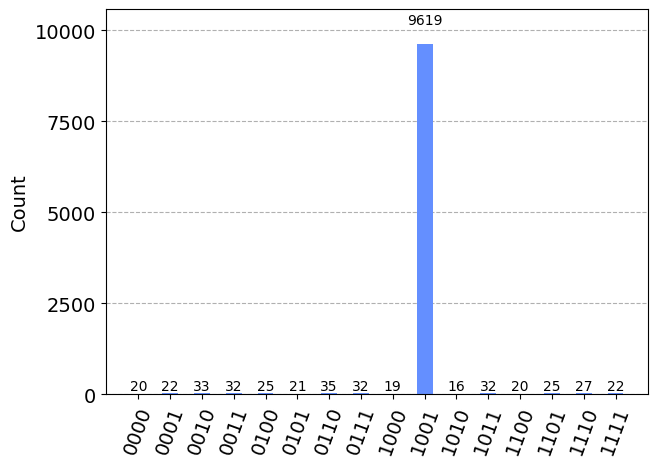

In [26]:
GSA_simulator = Aer.get_backend('qasm_simulator')
GSA_tqc = transpile(multirep(w),GSA_simulator)
GSA_result = GSA_simulator.run(GSA_tqc,shots=10000).result()
GSA_counts = GSA_result.get_counts()
plot_histogram(GSA_counts)

# Error correction : repetition bit-flip code

Encoding -> Pass through noise -> Error detection -> Error correction -> Decoding

In [104]:
def encoder(state:np.array):
    qc = QuantumCircuit(3,name="Encoder")
    qc.initialize(state,0)
    qc.cx(0,1)
    qc.cx(0,2)
    
    return qc

In [45]:
def decoder():
    qc = QuantumCircuit(3,name="Decoder")
    qc.cx(0,2)
    qc.cx(0,1)

    return qc

In [62]:
def noise(i:int):
    qc = QuantumCircuit(3,name="Noise")
    # induce some errors
    if i==0:
        pass
    else:
        qc.x(i-1)
    return qc

In [52]:
def error_detector():
    qc = QuantumCircuit(5,name="Error detector")
    qc.cx(1,3)
    qc.cx(2,3)
    qc.barrier()
    qc.cx(0,4)
    qc.cx(1,4)

    return qc

In [85]:
def error_correction():
    qc = QuantumCircuit(5,name="Error correction")
    # use the different syndroms to correct the false bits
    qc.x(3)
    qc.ccx(3,4,0)
    qc.x(3)
    qc.ccx(3,4,1)
    qc.x(4)
    qc.ccx(3,4,2)
    qc.x(4)
    return qc

In [105]:
state = [(1/5)**0.5,(4/5)**0.5]

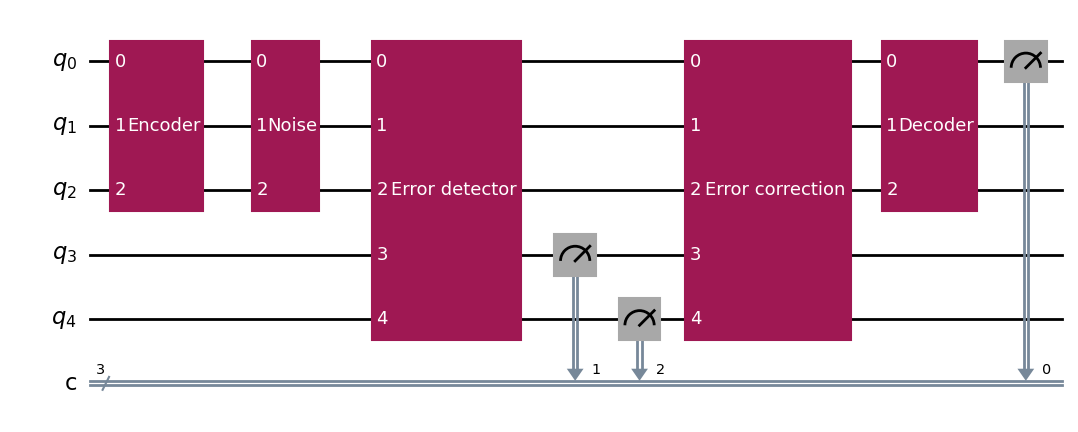

In [106]:
sys = QuantumCircuit(5,3)
sys.append(encoder(state),[0,1,2])
sys.append(noise(0),[0,1,2])
sys.append(error_detector(),[0,1,2,3,4])
sys.measure([3,4],[1,2])
sys.append(error_correction(),[0,1,2,3,4])
sys.append(decoder(),[0,1,2])
sys.measure(0,0)

sys.draw(output="mpl",style="iqp")


## Without noise nor correction

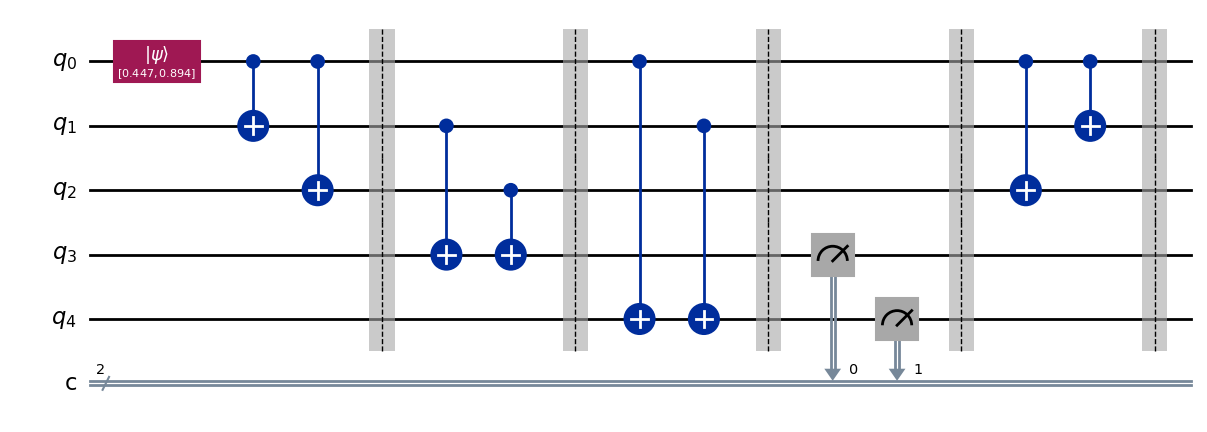

In [107]:
sys = QuantumCircuit(5,2)
sys.compose(encoder(state),[0,1,2],inplace=True)
sys.barrier()

sys.compose(error_detector(),[0,1,2,3,4],inplace=True)
sys.barrier()
sys.measure([3,4],[0,1])
sys.barrier()

sys.compose(decoder(),[0,1,2],inplace=True)
sys.barrier()

sys.draw(output="mpl",style="iqp")

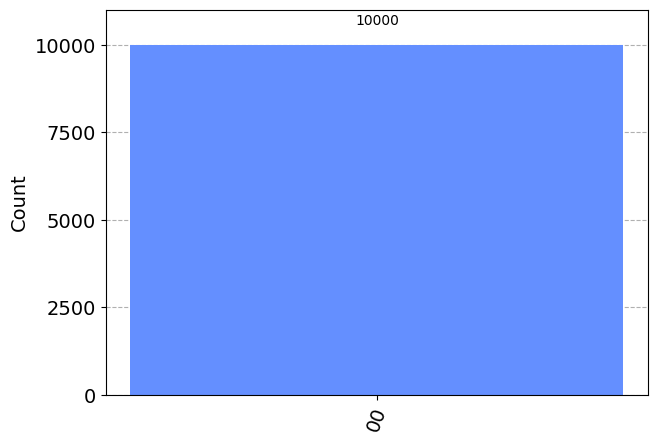

In [108]:
sys_simulator = Aer.get_backend('qasm_simulator')
sys_tqc = transpile(sys,sys_simulator)
sys_result = sys_simulator.run(sys_tqc,shots=10000).result()
sys_counts = sys_result.get_counts()
plot_histogram(sys_counts)

With no noise, we don't have any error !

### Error study

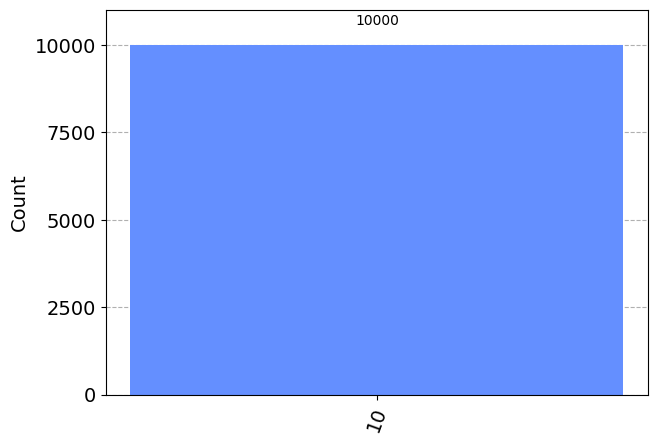

In [109]:
sys = QuantumCircuit(5,2)
sys.compose(encoder(state),[0,1,2],inplace=True)
sys.barrier()
sys.compose(noise(1),[0,1,2],inplace=True)
sys.barrier()
sys.compose(error_detector(),[0,1,2,3,4],inplace=True)
sys.barrier()
sys.measure([3,4],[0,1])
sys.barrier()
sys.compose(error_correction(),[0,1,2,3,4],inplace=True)
sys.barrier()
sys.compose(decoder(),[0,1,2],inplace=True)
sys.barrier()
#sys.measure(0,0)

sys_simulator = Aer.get_backend('qasm_simulator')
sys_tqc = transpile(sys,sys_simulator)
sys_result = sys_simulator.run(sys_tqc,shots=10000).result()
sys_counts = sys_result.get_counts()
plot_histogram(sys_counts)


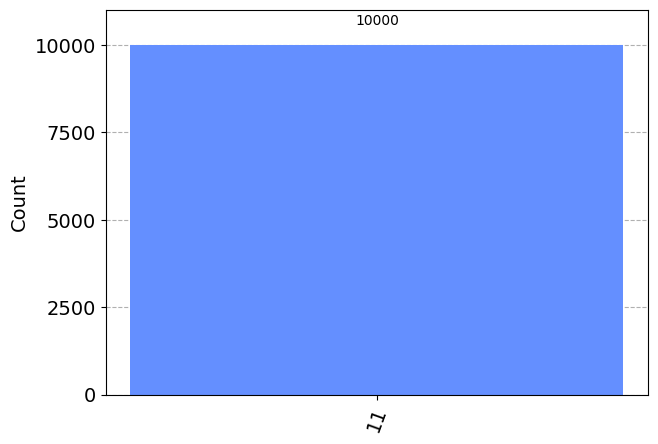

In [110]:
sys = QuantumCircuit(5,2)
sys.compose(encoder(state),[0,1,2],inplace=True)
sys.barrier()
sys.compose(noise(2),[0,1,2],inplace=True)
sys.barrier()
sys.compose(error_detector(),[0,1,2,3,4],inplace=True)
sys.barrier()
sys.measure([3,4],[0,1])
sys.barrier()
sys.compose(error_correction(),[0,1,2,3,4],inplace=True)
sys.barrier()
sys.compose(decoder(),[0,1,2],inplace=True)
sys.barrier()
#sys.measure(0,0)

sys_simulator = Aer.get_backend('qasm_simulator')
sys_tqc = transpile(sys,sys_simulator)
sys_result = sys_simulator.run(sys_tqc,shots=10000).result()
sys_counts = sys_result.get_counts()
plot_histogram(sys_counts)

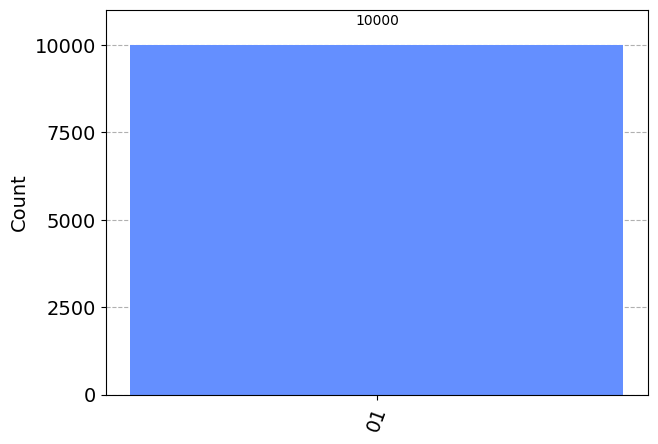

In [111]:
sys = QuantumCircuit(5,2)
sys.compose(encoder(state),[0,1,2],inplace=True)
sys.barrier()
sys.compose(noise(3),[0,1,2],inplace=True)
sys.barrier()
sys.compose(error_detector(),[0,1,2,3,4],inplace=True)
sys.barrier()
sys.measure([3,4],[0,1])
sys.barrier()
sys.compose(error_correction(),[0,1,2,3,4],inplace=True)
sys.barrier()
sys.compose(decoder(),[0,1,2],inplace=True)
sys.barrier()
#sys.measure(0,0)

sys_simulator = Aer.get_backend('qasm_simulator')
sys_tqc = transpile(sys,sys_simulator)
sys_result = sys_simulator.run(sys_tqc,shots=10000).result()
sys_counts = sys_result.get_counts()
plot_histogram(sys_counts)

If no noise, return $00$

If $X$ gate on qubit 0, return $10$

If $X$ gate on qubit 1, return $11$

If $X$ gare on qubit 2, return $01$

## Include noise and correction

### Without correction

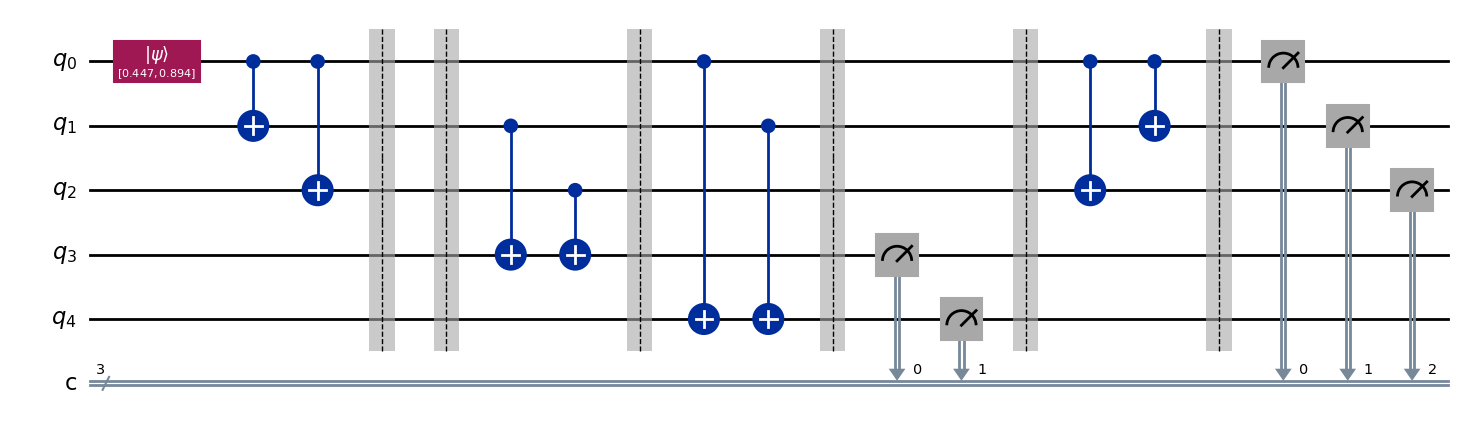

In [112]:
sys = QuantumCircuit(5,3)
sys.compose(encoder(state),[0,1,2],inplace=True)
sys.barrier()
sys.compose(noise(0),[0,1,2],inplace=True)
sys.barrier()
sys.compose(error_detector(),[0,1,2,3,4],inplace=True)
sys.barrier()
sys.measure([3,4],[0,1])
sys.barrier()

sys.compose(decoder(),[0,1,2],inplace=True)
sys.barrier()
sys.measure([0,1,2],[0,1,2])

sys.draw(output="mpl",style="iqp")

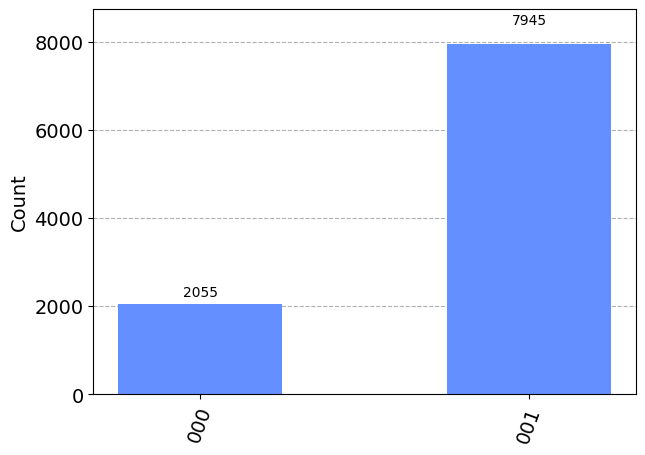

In [113]:
sys_simulator = Aer.get_backend('qasm_simulator')
sys_tqc = transpile(sys,sys_simulator)
sys_result = sys_simulator.run(sys_tqc,shots=10000).result()
sys_counts = sys_result.get_counts()
plot_histogram(sys_counts)

### With correction

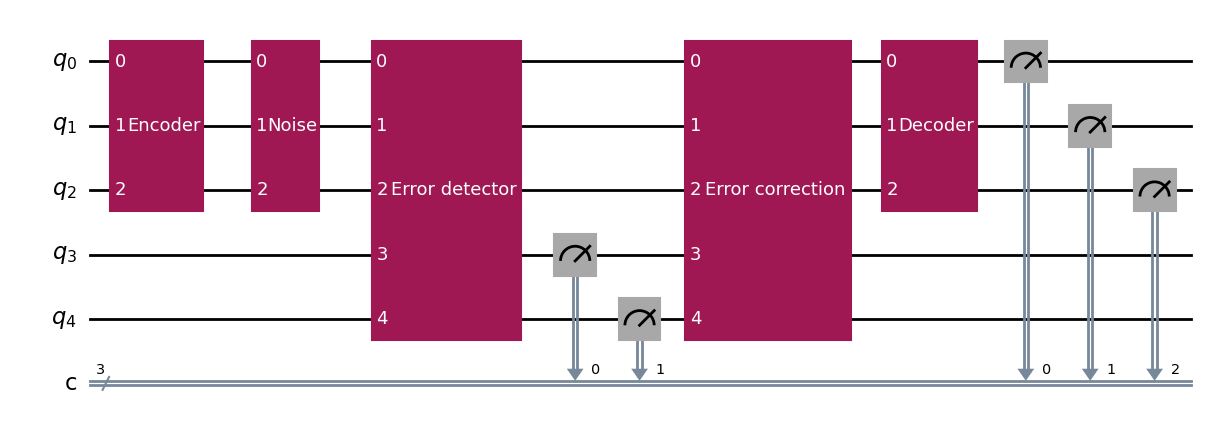

In [114]:
sys = QuantumCircuit(5,3)
sys.append(encoder(state),[0,1,2])
sys.append(noise(0),[0,1,2])
sys.append(error_detector(),[0,1,2,3,4])
sys.measure([3,4],[0,1])
sys.append(error_correction(),[0,1,2,3,4])
sys.append(decoder(),[0,1,2])
sys.measure([0,1,2],[0,1,2])

sys.draw(output="mpl",style="iqp")

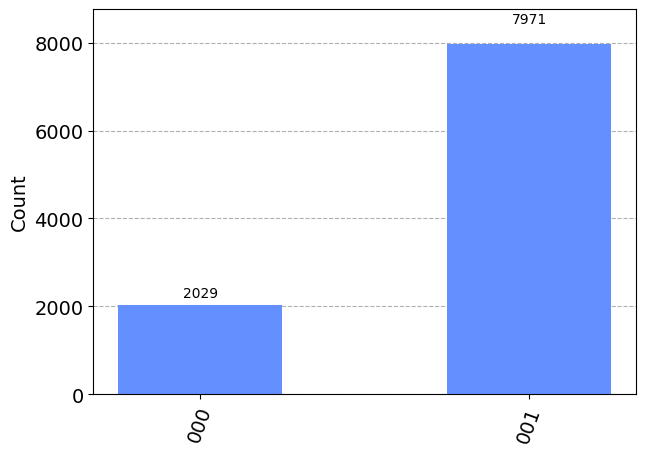

In [115]:
sys_simulator = Aer.get_backend('qasm_simulator')
sys_tqc = transpile(sys,sys_simulator)
sys_result = sys_simulator.run(sys_tqc,shots=10000).result()
sys_counts = sys_result.get_counts()
plot_histogram(sys_counts)